# Communicate your Data Findings
## Ford GoBikes Dataset

> About Dataset
The Dataset FORD GOBIKES is a archive of Ford's own programme of GoBikes. This dataset is provided by Ford themselves and the various variables in the data are enlisted:
 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender
 <br><br>
 ### References
 - [Data Gathering and Wrangling](#wrangle)
 - [Data Visualization](#visualize)
 > - [Univariate Analysis](#uni)
   - [Bivariate Analysis](#bi)
   - [Multivariate Analysis](#multi)

<a id = 'wrangle'></a>
## Data Gathering and Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

In [2]:
bike_df = pd.read_csv('201902-fordgobike-tripdata (1).csv')

In [3]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_df.duplicated().sum()

0

### Data Assessment
- There are a few nulls in the dataset and given the size of dataset, it seems appropriate to drop them.
- Also the columns with dates and times should be converted to datetime datatype.
- No duplicates in data.
- New column needed for age.
- Some columns can be dropped (lattitude longitude and station ids).

In [6]:
#DEFINE
#Remove nulls in the data. As there are only a few nulls compared to the data size, we can drop them all.

#CODE
bike_df = bike_df.dropna()

In [7]:
#TEST
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [8]:
#DEFINE
#Change datatype of 'start time' and 'end time' columns from object type to date time

#CODE
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

#TEST
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [9]:
#DEFINE
#Convert station ids and birth year from float to int data types
#First check if any faulty float value exists for station ids in the column
print(np.array_equal(bike_df.start_station_id, bike_df.start_station_id.astype(int)))
print(np.array_equal(bike_df.member_birth_year, bike_df.member_birth_year.astype(int)))
print(np.array_equal(bike_df.end_station_id, bike_df.end_station_id.astype(int)))

#CODE
bike_df.start_station_id = bike_df.start_station_id.astype('int')
bike_df.end_station_id = bike_df.end_station_id.astype('int')
bike_df.member_birth_year = bike_df.member_birth_year.astype('int')

#TEST
bike_df.info()

True
True
True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  u

In [10]:
#DEFINE
#For analysis, it is better to have a column for age instead of member birth years.

#CODE
bike_df['age'] = 2019 - bike_df.member_birth_year

#TEST
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


In [11]:
#DEFINE
#Drop unnecessary columns, irrelevant for analysis

#CODE
bike_df.drop(columns = ['start_station_id', 'end_station_id', 'start_station_latitude', 'end_station_latitude', 'start_station_longitude', 'end_station_longitude'], inplace = True)

#TEST
bike_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60


In [12]:
bike_df = bike_df.reset_index(drop = True)
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60
5,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983,Female,No,36
6,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989,Male,No,30
7,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988,Other,No,31
8,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,6488,Subscriber,1992,Male,No,27
9,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996,Female,Yes,23


Now the dataset looks quite clean and tidy and ready for exploratory and explanatory analysis. 

#### Main Analysis of interest in the dataset

> The dataset has relatively fewer features for a lot of analysis. But following possible analysis I feel are quite relevant and interesting:
- Duration Seconds of User types.
- Most popular start and end stations.
- Duration Seconds vs Age.
- Gender vs Duration Seconds
- Gender vs Age (Does a particular gender prefer bikes in certain age group more than the other)
- Distribution of types of customers
- Distribiution of Duration seconds

**Some questions which are of interest and which I would like to know of by the end of analysis are:**<br>
- On what factors does the duration of trip depend? Does it have a correlation with say age, gender, type of customer, particular bike station, etc.

<a id = 'visualize'></a>
## Data Visualization

<a id = 'uni'></a>
### Univariate Exploration


1) First of all let us see distribution of duration(in seconds).<br><br>
**Q: How long do people usually use the Ford GoBike? How does the distribution of Duration bike was used look like?**

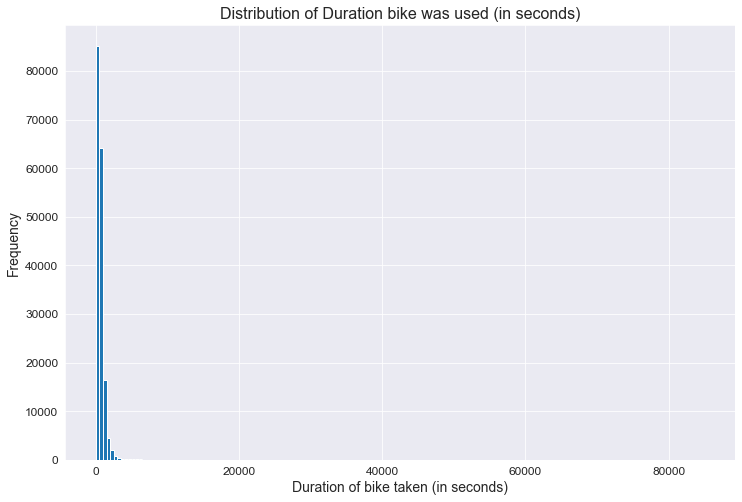

In [13]:
binsize = 500
bins = np.arange(0, bike_df["duration_sec"].max()+binsize, binsize)

plt.figure(figsize = (12,8))
plt.hist(bike_df.duration_sec, bins = bins)
plt.title('Distribution of Duration bike was used (in seconds)', fontsize = 16)
plt.xlabel('Duration of bike taken (in seconds)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

A huge tail can be seen in the distribution of duration bikes were used. This clearly suggests that mostly people used bikes for smaller durations. Let us try to make the distribution normal and then draw conclusions.

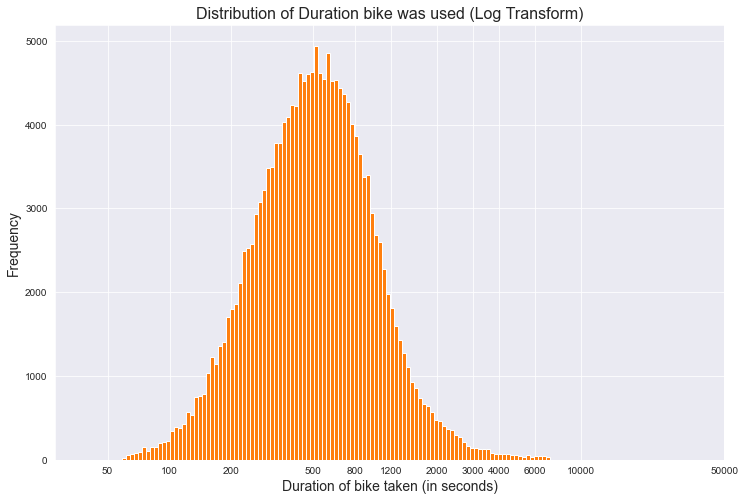

In [14]:
log_binsize = 0.025
bins = 6 ** np.arange(2, np.log10(bike_df["duration_sec"].max())+log_binsize, log_binsize)
default_color = sb.color_palette()[1]

plt.figure(figsize = (12,8))
plt.hist(data = bike_df, x = "duration_sec", bins = bins, color = default_color)
plt.xscale("log")
plt.xticks([50, 100, 200, 500, 800, 1200,2000,3000,4000,6000,10000,50000], [50, 100, 200, 500, 800, 1200,2000,3000,4000,6000,10000,50000])
plt.title('Distribution of Duration bike was used (Log Transform)', fontsize = 16)
plt.xlabel('Duration of bike taken (in seconds)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

This distribution looks fairly normal. We can clearly observe that most datapoints are contained within less than 3000s range. Let us look at the distribution below 3000 seconds also.

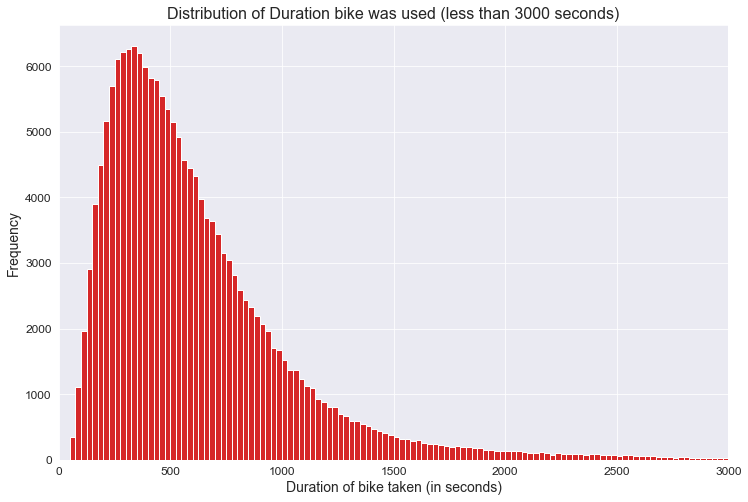

In [15]:
binsize = 25
bins = np.arange(0, 3000+binsize, binsize)
default_color = sb.color_palette()[3]

plt.figure(figsize = (12,8))
plt.hist(bike_df.duration_sec, bins = bins, color = default_color)
plt.xlim(xmin = 0,xmax = 3000)
plt.title('Distribution of Duration bike was used (less than 3000 seconds)', fontsize = 16)
plt.xlabel('Duration of bike taken (in seconds)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [16]:
bike_df[bike_df.duration_sec > 3000].count()[0]/len(bike_df)

0.010997302117152134

`The duration(in seconds) is largely comprised within the <3000 seconds range. Only 1% of the total data constitutes of the duration more than 3000s.` <br>
`Morever we can see the distribution is highly left skewed even in the 0-3000s range.` Most users prefer to use the bike for a shorter term roughly for 500 seconds.

2) Now let us use the date time column.<br><br>
**Q: For the period the survey was run, was there a particular trend such that more bikes were used at a certain period than other? Also is there any dependence of bikes used on day of week?**

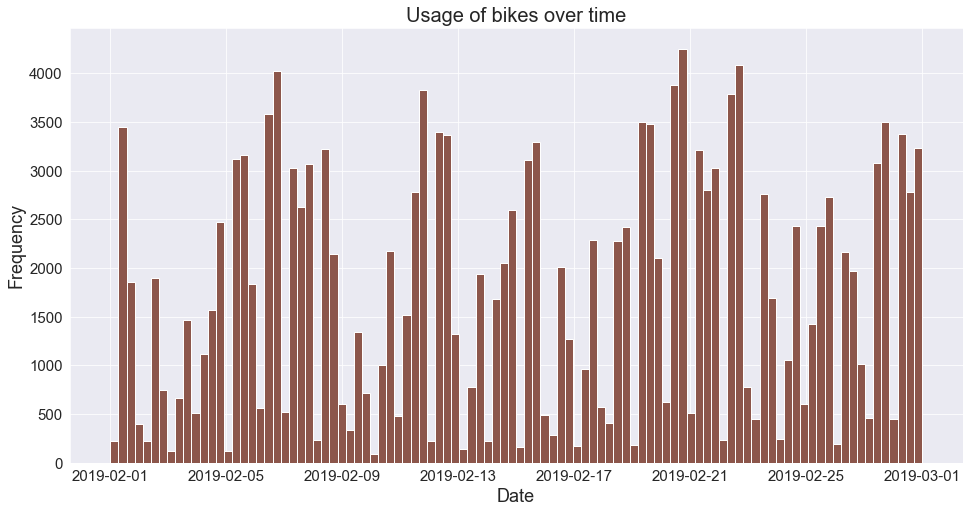

In [17]:
default_color = sb.color_palette()[5]
plt.figure(figsize = (16,8))
plt.hist(bike_df.start_time, bins = 100, color = default_color)
plt.title('Usage of bikes over time', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
bike_df.start_time.dt.day.value_counts()

28    9448
20    9246
21    9120
19    9096
7     8798
22    8765
6     8655
11    8315
12    8155
5     8136
27    7447
15    6977
25    6757
14    6346
8     6094
1     5827
18    5296
4     5273
26    5197
23    5128
24    4229
17    3877
16    3734
10    3697
13    3078
2     3003
3     2709
9     2549
Name: start_time, dtype: int64

The survey was run for one month (1 Feb - 28 Feb 2019) hence all days' values were unique.<br>
- Although not a great relation can be inferred; crudely we can say `more bikes were used after 15 than before 15`.
- Such random relation suggests that usage of bikes could be related with day of week.

In [19]:
count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
def dow(x):
    day_of_week = x.dayofweek
    for key, value in count.items():
        if(key == day_of_week):
            count[key] = value+1            

bike_df['start_time'].apply(lambda x: dow(x))
for key,value in count.items():
    print(value)

25641
30584
28426
33712
27663
14414
14512


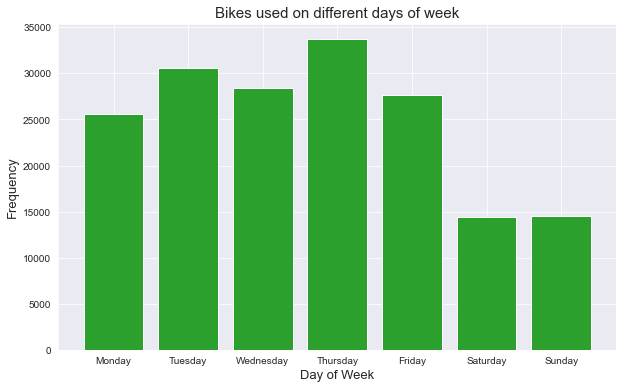

In [20]:
default_color = sb.color_palette()[2]
plt.figure(figsize = (10,6))
names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
values = list(count.values())

plt.bar(range(len(count)), values, tick_label=names, color = default_color)
plt.title('Bikes used on different days of week', fontsize= 15)
plt.xlabel('Day of Week', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13)
plt.show()

Clearly a strong correlation with day of week is evident. `Significantly more bikes were taken on week days than on weekends`

3) Start and end stations<br><br>
**Q: Which are the most popular start and end stations? Are the popular start and end stations similar?**

In [21]:
data1 = bike_df.start_station_name.value_counts()[0:15]
data1

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
The Embarcadero at Sansome St                                1975
Bancroft Way at Telegraph Ave                                1761
Bancroft Way at College Ave                                  1712
2nd St at Townsend St                                        1702
Beale St at Harrison St                                      1678
Name: star

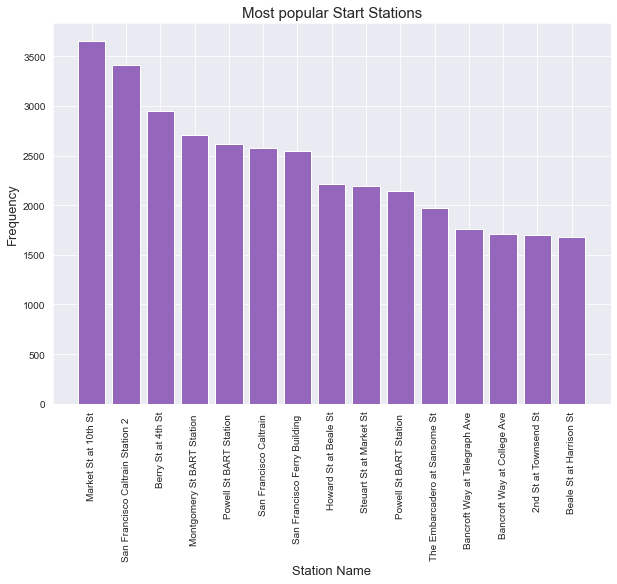

In [22]:
default_color = sb.color_palette()[4]

names = list(data1.index)
for i in range(len(names)):
    names[i] = names[i].split('(')[0]
    
values = list(data1.values)
plt.figure(figsize = (10,7))
plt.bar(range(len(data1)), values, tick_label=names, color = default_color)
plt.title('Most popular Start Stations', fontsize= 15)
plt.xlabel('Station Name', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13)
plt.xticks(rotation = 90)
plt.show()

In [23]:
data2 = bike_df.end_station_name.value_counts()[0:15]
data2

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4624
Market St at 10th St                                               3709
Montgomery St BART Station (Market St at 2nd St)                   3461
San Francisco Ferry Building (Harry Bridges Plaza)                 3151
San Francisco Caltrain (Townsend St at 4th St)                     2870
Powell St BART Station (Market St at 4th St)                       2854
Berry St at 4th St                                                 2782
The Embarcadero at Sansome St                                      2341
Steuart St at Market St                                            2264
Powell St BART Station (Market St at 5th St)                       2153
Howard St at Beale St                                              1970
Bancroft Way at Telegraph Ave                                      1780
Beale St at Harrison St                                            1780
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

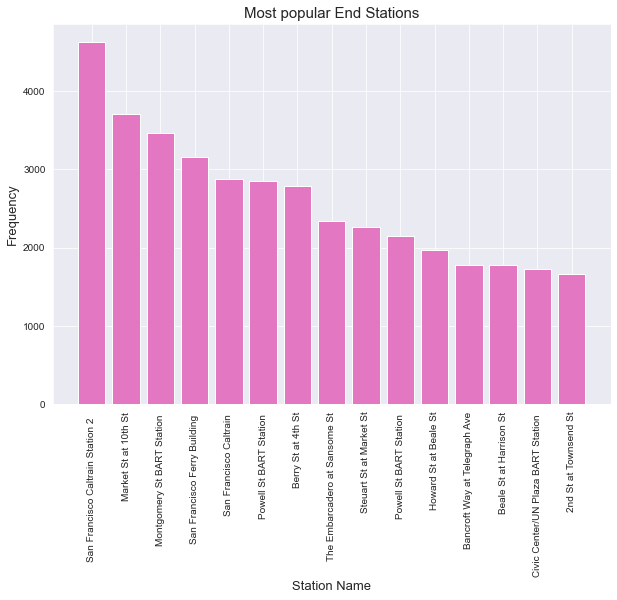

In [24]:
default_color = sb.color_palette()[6]
names = list(data2.index)
for i in range(len(names)):
    names[i] = names[i].split('(')[0]
    
values = list(data2.values)
plt.figure(figsize = (10,7))
plt.bar(range(len(data2)), values, tick_label=names, color = default_color)
plt.title('Most popular End Stations', fontsize= 15)
plt.xlabel('Station Name', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13)
plt.xticks(rotation = 90)
plt.show()

**Market Street**, **San Francisco Caltrain Station 2** and **Montgomery St BART Station** `are the most popular start and end stations.` A trend we can observe is that the start and end stations are almost the same, implying that these stations were the ones which saw heavy traffic of GoBikes.

4) **Bar Graphs for Gender count, Age and user type.**

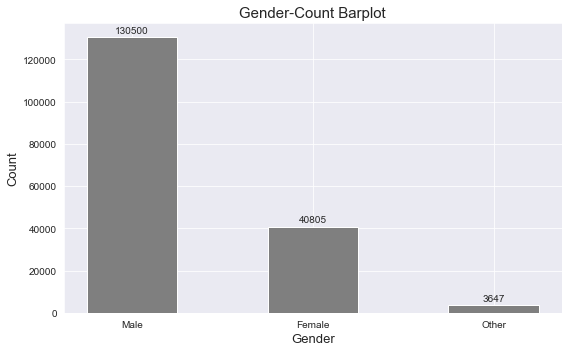

In [25]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
default_color = sb.color_palette()[7]

x = ([0, 1, 2]) # the label locations
width = 0.5 # the width of the bars
fig, ax = plt.subplots()
plt.title('Gender-Count Barplot', fontsize = 15)
plt.ylabel('Count', fontsize = 13)
plt.xlabel('Gender', fontsize = 13)
ax.set_xticks(x)
ax.set_xticklabels(['Male','Female','Other'])
pps = ax.bar(x , bike_df.member_gender.value_counts(), width, label='Count', color = default_color)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+2000, s="{}".format(height), ha='center')

plt.show()

A lot of bike users were males(130500), lesser were females(40805) and even fewer were other genders(3647).

In [26]:
age_ht = [0,0,0,0,0,0,0,0,0,0]
def age_height(age):
    if(age>0 and age<=10):
        age_ht[0] = age_ht[0]+1
    if(age>10 and age<=20):
        age_ht[1] = age_ht[1]+1
    if(age>20 and age<=30):
        age_ht[2] = age_ht[2]+1
    if(age>30 and age<=40):
        age_ht[3] = age_ht[3]+1
    if(age>40 and age<=50):
        age_ht[4] = age_ht[4]+1
    if(age>50 and age<=60):
        age_ht[5] = age_ht[5]+1
    if(age>60 and age<=70):
        age_ht[6] = age_ht[6]+1
    if(age>70 and age<=80):
        age_ht[7] = age_ht[7]+1
    if(age>80 and age<=90):
        age_ht[8] = age_ht[8]+1
    if(age>90 and age<=100):
        age_ht[9] = age_ht[9]+1
    

bike_df.age.apply(lambda x: age_height(x))

0         None
1         None
2         None
3         None
4         None
          ... 
174947    None
174948    None
174949    None
174950    None
174951    None
Name: age, Length: 174952, dtype: object

In [27]:
age_ht

[0, 4213, 70054, 63808, 22024, 11323, 2955, 383, 115, 5]

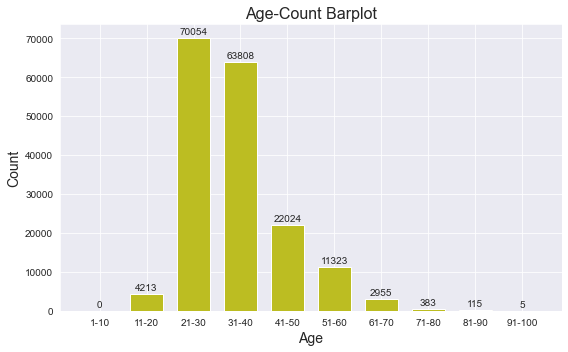

In [28]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
default_color = sb.color_palette()[8]

x = ([0, 1, 2, 3, 4, 5, 6, 7, 8,9]) # the label locations
width = 0.7 # the width of the bars
fig, ax = plt.subplots()
plt.title('Age-Count Barplot', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
pps = ax.bar(x , age_ht, width, label='Count', color = default_color)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+1000, s="{}".format(height), ha='center')

plt.show()

Maximum users are from age bracket 21-30 Y (70054) followed by 31-40 Y (63808). Very few people are from age bracket above 70 years (roughly 500 users). Also this segment is giving a skew to our distribution, hence let us drop them off.

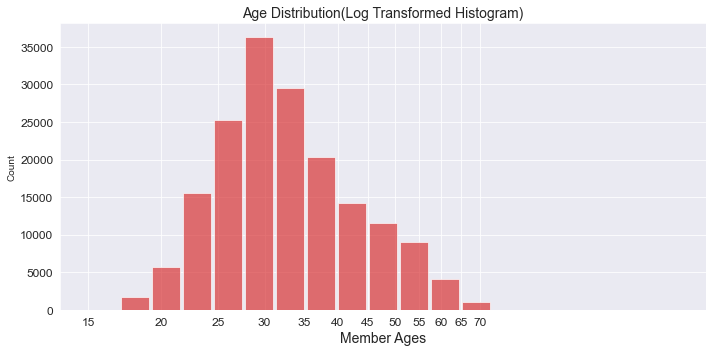

In [75]:
log_binsize = 0.045
bins = 15 ** np.arange(1, np.log10(70)+log_binsize, log_binsize)
default_color = sb.color_palette()[3]

plt.figure(figsize=[10, 5])
plt.hist(x=bike_df[bike_df.age < 70].age, bins = bins, rwidth = 0.9, alpha = 0.65, color = default_color)
plt.xscale("log")
plt.xticks([15,20,25,30,35,40,45,50,55,60,65,70], [15,20,25,30,35,40,45,50,55,60,65,70])
plt.xlabel("Member Ages", fontsize = 14)
plt.ylabel("Count")
plt.title("Age Distribution(Log Transformed Histogram)", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

Now the distribution of `age` looks fairly normally distributed. The result is still the same `More younger people(24-40) used the bikes than elder ones or new borns` all of which makes sense too.

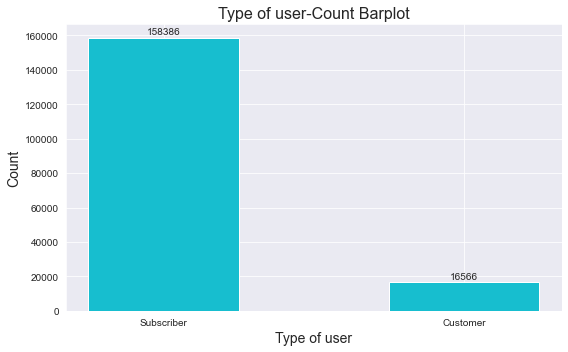

In [30]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
default_color = sb.color_palette()[9]

x = ([0, 1]) # the label locations
width = 0.5 # the width of the bars
fig, ax = plt.subplots()
plt.title('Type of user-Count Barplot', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Type of user', fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(['Subscriber', 'Customer'])
pps = ax.bar(x , bike_df.user_type.value_counts(), width, label='Count', color = default_color)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+2000, s="{}".format(height), ha='center')

plt.show()

There are only a few Customers(16566) and most users are just Subscribers(158386).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? 

>- The distributions of a few variables like the age and ride duration were quite interesting but were as expected. There was an extreme skew (right) in the distribution of duration of bike used while in distribution og age there was a skew (right) much lesser. Both of these were needed to be **log transformed** to fix the right skewness in both the distributions.
- Apart from this we also looked at distributions in certain ranges by limiting the axes limits (again in case of age and duration distributions). This was done to look closely at data which had almost 99% of the datapoints. What we omitted were mostly the outlier cases.

<a id = 'bi'></a>
## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the data. Most of the variables which will be used have already been analyzed in the Univariate analysis portion. 

In [48]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60


**Q: Does any correlation occur between gender and age of peple using the bike?**

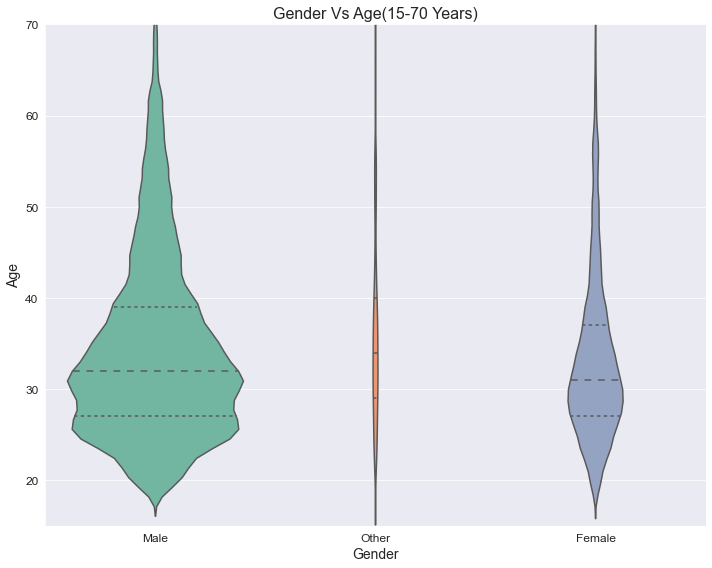

In [86]:
plt.figure(figsize = [10, 8])
sb.violinplot(data= bike_df, x="member_gender", y="age", palette="Set2",scale = 'count', inner="quartile")
plt.ylim(ymin = 15, ymax = 70)
plt.title("Gender Vs Age(15-70 Years)", fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Age', fontsize =14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show();

The median age of men using the bike is roughly `32` years, for women it is `31` years and for others it is almost `35` years. The IQR for men, women and others is roughly 12, 11 and 11 years. The width of violin plots gives us the idea about the number of data points of the particular category: highest for men, fewer for women and very few for others.

**Q: Relation between Duration and Age**

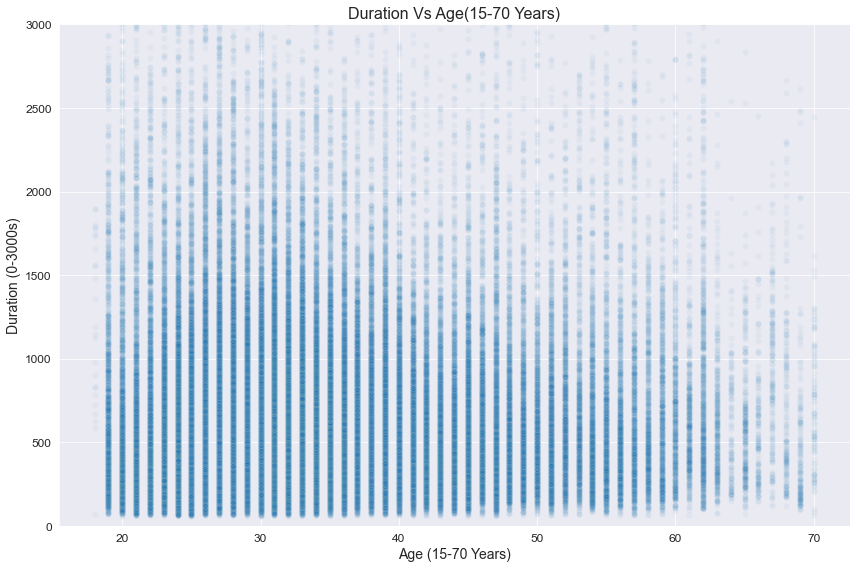

In [88]:
plt.figure(figsize = (12,8))
sb.scatterplot(x = bike_df[bike_df.age <=70].age, y = bike_df[bike_df.age <=70].duration_sec, alpha = 0.05)
plt.ylim(ymin = 0, ymax = 3000)
plt.title('Duration Vs Age(15-70 Years)', fontsize = 16)
plt.xlabel('Age (15-70 Years)', fontsize = 14)
plt.ylabel('Duration (0-3000s)', fontsize =14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show();

Most favored duration for ride for all ages is roughly `2 minutes to 35 minutes`. We considered duration less than 3000s as it contributes to 99% of the data. Including such outlier cases may have hidden the crucial detail we can get right now from the plot.

**Q: What is the average duration a bike was used on different week days?**

In [109]:
count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
cnt = [0,0,0,0,0,0,0]
def dur_week(duration, time):
    day_of_week = time.dayofweek
    for key, value in count.items():
        if(key == day_of_week):
            count[key] = value + duration
            cnt[key] = cnt[key]+1

bike_df.apply(lambda row : dur_week(row['duration_sec'], row['start_time']), axis = 1)


for i in range(7):
    count[i] = int(count[i]/cnt[i])

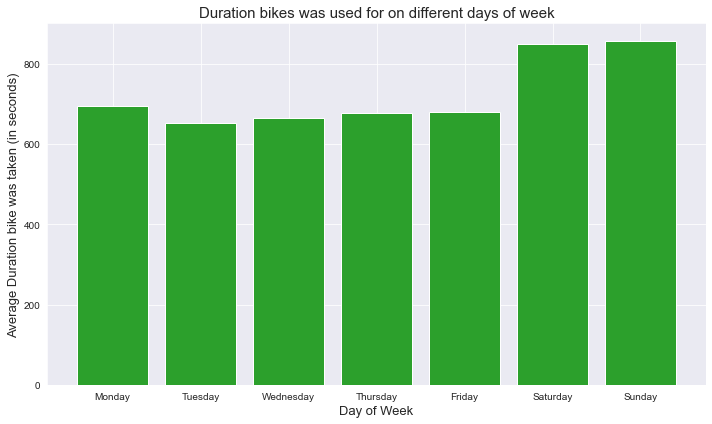

In [119]:
default_color = sb.color_palette()[2]
plt.figure(figsize = (10,6))
names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
values = list(count.values())

plt.bar(range(len(count)), values, tick_label=names, color = default_color)
plt.title('Duration bikes was used for on different days of week', fontsize= 15)
plt.xlabel('Day of Week', fontsize= 13)
plt.ylabel('Average Duration bike was taken (in seconds)', fontsize= 13)
plt.show()

Now `Average duration bikes were used for is greater on weekends than on weekdays`. Earlier we had seen that frequency of bike users was more on weekdays than on weekends. Thus we can conclude that `although lesser people used bikes on weekends, those who did, used it for much longer average duration (on weekends as compared to weekdays).`

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id = 'multi'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**Q: How does Average duration for Men and Women vary over Age?**

Now if plot age vs duration directly for the genders, we would get a bad line graph, which would be expected too. It would happen due to the fact that python would directly plot all the 100000+ points on the graph and then try to connect them with the line (in case we go for aline graph). Hence to plot a neat looking line, we would calculate averaged value of duration for each age and then plot it. This we do in the following code, first for men and then for women, seaprately.

In [31]:
bike_df_male = bike_df[(bike_df.member_gender == 'Male') & (bike_df.age<=70)]
bike_df_male = bike_df_male.reset_index(drop = True)

dur_male = [0 for i in range(55)]
cnt_male = [0 for i in range(55)]
def calc_dur(duration, age):
    for i in range(15,70):
        if(i == age):
            dur_male[i-15] = dur_male[i-15]+duration
            cnt_male[i-15] = cnt_male[i-15] + 1

bike_df_male.apply(lambda row : calc_dur(row['duration_sec'], row['age']), axis = 1)

for i in range(55):
    if(cnt_male[i] !=0):
        dur_male[i] = int(dur_male[i]/cnt_male[i])

In [32]:
bike_df_female = bike_df[(bike_df.member_gender == 'Female')& (bike_df.age <=70)]
bike_df_female = bike_df_female.reset_index(drop = True)

dur_female = [0 for i in range(55)]
cnt_female = [0 for i in range(55)]
def calc_dur(duration, age):
    for i in range(15,70):
        if(i == age):
            dur_female[i-15] = dur_female[i-15]+duration
            cnt_female[i-15] = cnt_female[i-15] + 1

bike_df_female.apply(lambda row : calc_dur(row['duration_sec'], row['age']), axis = 1)

for i in range(55):
    if(cnt_female[i] !=0):
        dur_female[i] = int(dur_female[i]/cnt_female[i])

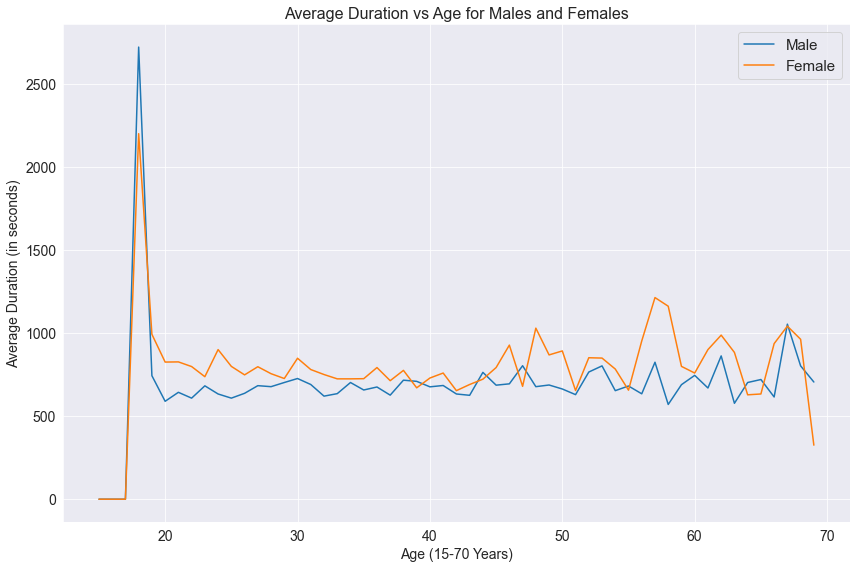

In [76]:
plt.figure(figsize = (12,8))
plt.plot([i for i in range(15,70)], dur_male, label = 'Male')
plt.plot([i for i in range(15,70)], dur_female, label = 'Female')
plt.legend(prop={'size':15})
 
plt.title('Average Duration vs Age for Males and Females', fontsize = 16)
plt.xlabel('Age (15-70 Years)', fontsize = 14)
plt.ylabel('Average Duration (in seconds)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

`On Average, Women above 20 years of age tend to use the bike for more duration than Men.` But while stating this we also need to bear in mind that datapoints backing the trend for women is significatly less than that for men. Hence it would have been even more wrong to include 'others' as the third category because there is a very few data for it and the data would be highly spiky(as outliers would have pronounced effects) and hide important insights which we might be able to deduce now.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!